In [5]:
import connectome_embed_nature
import os 
import ndmg
import os.path as op
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
from ndmg.stats.qa_graphs import *
import scipy.stats
import math

In [6]:
node_names = pd.read_csv('/project/6008063/llevitis/DIAN/scale033_parc.csv')

In [7]:
node_names

,id,label,hemisphere,cortical,scale
0,1,lateralorbitofrontal,right,cortical,scale033
1,2,parsorbitalis,right,cortical,scale033
2,3,frontalpole,right,cortical,scale033
3,4,medialorbitofrontal,right,cortical,scale033
4,5,parstriangularis,right,cortical,scale033
5,6,parsopercularis,right,cortical,scale033
6,7,rostralmiddlefrontal,right,cortical,scale033
7,8,superiorfrontal,right,cortical,scale033
8,9,caudalmiddlefrontal,right,cortical,scale033
9,10,precentral,right,cortical,scale033


In [63]:
unicode('0')
nodes_to_unicode = [unicode(str(x)) for x in node_names.id]

In [69]:
nodes_to_unicode

[u'1',
 u'2',
 u'3',
 u'4',
 u'5',
 u'6',
 u'7',
 u'8',
 u'9',
 u'10',
 u'11',
 u'12',
 u'13',
 u'14',
 u'15',
 u'16',
 u'17',
 u'18',
 u'19',
 u'20',
 u'21',
 u'22',
 u'23',
 u'24',
 u'25',
 u'26',
 u'27',
 u'28',
 u'29',
 u'30',
 u'31',
 u'32',
 u'33',
 u'34',
 u'35',
 u'36',
 u'37',
 u'38',
 u'39',
 u'40',
 u'41',
 u'42',
 u'43',
 u'44',
 u'45',
 u'46',
 u'47',
 u'48',
 u'49',
 u'50',
 u'51',
 u'52',
 u'53',
 u'54',
 u'55',
 u'56',
 u'57',
 u'58',
 u'59',
 u'60',
 u'61',
 u'62',
 u'63',
 u'64',
 u'65',
 u'66',
 u'67',
 u'68',
 u'69',
 u'70',
 u'71',
 u'72',
 u'73',
 u'74',
 u'75',
 u'76',
 u'77',
 u'78',
 u'79',
 u'80',
 u'81',
 u'82',
 u'83']

In [70]:
node_dict = dict.fromkeys(nodes_to_unicode)
for x in nodes_to_unicode: 
    j = int(x) - 1
    node_dict[x] = node_names.loc[j, 'label']

In [71]:
node_dict

{u'1': 'lateralorbitofrontal',
 u'10': 'precentral',
 u'11': 'paracentral',
 u'12': 'rostralanteriorcingulate',
 u'13': 'caudalanteriorcingulate',
 u'14': 'posteriorcingulate',
 u'15': 'isthmuscingulate',
 u'16': 'postcentral',
 u'17': 'supramarginal',
 u'18': 'superiorparietal',
 u'19': 'inferiorparietal',
 u'2': 'parsorbitalis',
 u'20': 'precuneus',
 u'21': 'cuneus',
 u'22': 'pericalcarine',
 u'23': 'lateraloccipital',
 u'24': 'lingual',
 u'25': 'fusiform',
 u'26': 'parahippocampal',
 u'27': 'entorhinal',
 u'28': 'temporalpole',
 u'29': 'inferiortemporal',
 u'3': 'frontalpole',
 u'30': 'middletemporal',
 u'31': 'bankssts',
 u'32': 'superiortemporal',
 u'33': 'transversetemporal',
 u'34': 'insula',
 u'35': 'thalamusproper',
 u'36': 'caudate',
 u'37': 'putamen',
 u'38': 'pallidum',
 u'39': 'accumbensarea',
 u'4': 'medialorbitofrontal',
 u'40': 'hippocampus',
 u'41': 'amygdala',
 u'42': 'lateralorbitofrontal',
 u'43': 'parsorbitalis',
 u'44': 'frontalpole',
 u'45': 'medialorbitofrontal'

In [73]:
curr_graph = graphs['sub-1BVPA1_ses-1BVPA1sv02smr_dwi_Desikan2012.edgelist']

In [74]:
H=nx.relabel_nodes(curr_graph,node_dict)

In [93]:
list(H.nodes())

['superiorparietal',
 'pallidum',
 'caudalanteriorcingulate',
 'cuneus',
 'parahippocampal',
 'isthmuscingulate',
 'rostralanteriorcingulate',
 'parsopercularis',
 'accumbensarea',
 'thalamusproper',
 'pericalcarine',
 'transversetemporal',
 'putamen',
 'caudalmiddlefrontal',
 'fusiform',
 'caudate',
 'parstriangularis',
 'precentral',
 'postcentral',
 'superiortemporal',
 'middletemporal',
 'entorhinal',
 'rostralmiddlefrontal',
 'insula',
 'inferiortemporal',
 'frontalpole',
 'hippocampus',
 'posteriorcingulate',
 'medialorbitofrontal',
 'lateraloccipital',
 'bankssts',
 'paracentral',
 'parsorbitalis',
 'amygdala',
 'supramarginal',
 'lingual',
 'brainstem',
 'inferiorparietal',
 'temporalpole',
 'superiorfrontal',
 'lateralorbitofrontal',
 'precuneus']

In [8]:
import numpy as np
import networkx as nx
import node2vec
from gensim.models import Word2Vec
from sklearn.preprocessing import Normalizer
import pickle

def create_embedding(dir_name, input_edge_list, output_embedding, current_dti, current_name,
                     permutation_no=500, lesion_node = 0, dimensions=30, walk_length=20,
                     num_walks=800, window_size=3, iter=1, workers=10, p=0.1, q=1.6, sg=0,
                     weighted=True, directed=False):
    '''

    Args:
        Connectome embedding related attributes
        dir_name: directory name
        input_edge_list:  name of input edge list
        output_embedding: name of output embedding
        current_dti: matrix of current dti to embbed
        current_name: name of the analysis
        permutation_no: how many permutations are needed
        lesion_node: if a lesion node is needed

        node2vec related attributes
        dimensions: dimensions of embeddings
        walk_length: Length of walk per source
        num_walks:Number of walks per source
        window_size : Context size for optimization
        iter : Number of epochs in SGD
        workers : Number of parallel workers
        p: Return hyperparameter
        q: Inout hyperparameter
        sg: skipgram = 1, cbow=0
        weighted:Boolean specifying (un)weighted
        directed:Graph is (un)directed


    Returns:
        word2Vecmodelsorted: word2vec embeddings

    '''
    zero = 1.11324633283e-16
    #creating edge list in the format which is digestible by node2vec
    if lesion_node > 0:

        with open(input_edge_list, 'w') as edge_list:
            for r in range(current_dti.shape[0]):
                for c in range(current_dti.shape[0]):
                    if current_dti[r, c] != 0 and r != lesion_node and c != lesion_node:
                        edge_list.write('%s %s %s \n' % (r, c, current_dti[r, c]))
                    if r == lesion_node or c == lesion_node:
                        edge_list.write('%s %s %s \n' % (r, c, zero))

    else:
        with open(input_edge_list, 'w') as edge_list:
            for r in range(current_dti.shape[0]):
                for c in range(current_dti.shape[0]):
                    if current_dti[r, c] != 0:
                        edge_list.write('%s %s %s \n' % (r, c, current_dti[r, c]))

    # we multiply the num_walks by  permutation_no to save time in calling the functions.
    walks_agg = node2vec_agg_walks(input_edge_list, walk_length=walk_length, num_walks=num_walks * permutation_no,
                                   workers=workers, p=p, q=q, weighted=weighted, directed=directed)
    with open(dir_name + current_name + '_walks_lesion_' + str(lesion_node), 'w') as f:
        pickle.dump(walks_agg, f)
    word2Vecmodelsorted = node2veclearn_agg(walks_agg, output_embedding, num_walks=num_walks,
                                            permutation_no=permutation_no, number_of_nodes=current_dti.shape[0],
                                            dimensions=dimensions, window_size=window_size, iter=iter, workers=workers)

    return word2Vecmodelsorted

def read_graph(input_edge_list, weighted, directed, node_names):
    '''
    Reads the input network in networkx.
    '''
    if weighted:
        G = nx.read_edgelist(input_edge_list, nodetype=int, data=(('weight', float),), create_using=nx.DiGraph())
    else:
        G = nx.read_edgelist(input_edge_list, nodetype=int, create_using=nx.DiGraph())
        for edge in G.edges():
            G[edge[0]][edge[1]]['weight'] = 1

    if not directed:
        G = G.to_undirected()
        
    node_dict = dict.fromkeys(node_names.id)
    for x in node_dict: 
        j = int(x) - 1
        node_dict[x] = node_names.loc[j, 'hemisphere'] + node_names.loc[j, 'label']
    
    #node_dict = dict.fromkeys(G.nodes())
    #for x in node_dict: 
    #    node_dict[x] = int(x) - 1
        
    H=nx.relabel_nodes(G,node_dict)
    return H


def learn_embeddings(walks, dimensions, window_size, workers, iter, output_embedding, sg=0):
    '''
    Learn embeddings
    '''
    walks = [map(str, walk) for walk in walks]
    model = Word2Vec(walks, size=dimensions, window=window_size, min_count=0, sg=sg,
                     workers=workers, iter=iter)
    model.save(output_embedding + '.embeddings')
    # model.save_word2vec_format(output_embedding + 'word2vecformat.embeddings')

    return model


def normalize_embeddings(word2Vecmodel, node_names):
    normalizer = Normalizer(copy=False)

    word2Vecmodelsorted = np.zeros([word2Vecmodel.wv.syn0.shape[0], word2Vecmodel.wv.syn0.shape[1]])
    for i in list(node_names.label):
    #for i in range(word2Vecmodel.wv.syn0.shape[0]):
        model_copy = np.copy(word2Vecmodel[i])
        reshaped_model = np.reshape(model_copy, (1, -1))
        word2Vecmodelsorted[i] = normalizer.fit_transform(reshaped_model)
    return word2Vecmodelsorted


def node2veclearn(input_edge_list, output_embedding, node_names, dimensions=128, walk_length=10, num_walks=10, window_size=10,
                  iter=1, workers=8, p=1, q=1, weighted=True, directed=True, sg=0):
    """Pipeline for representational learning for all nodes in a graph.

    Keyword arguments:
    input_edge_list -- Input graph path
    output_embedding -- Embeddings path
    dimensions -- Number of dimensions (default=128)
    walk-length -- Length of walk per source (default=10)
    num-walks -- Number of walks per source (default=10)
    window-size -- Context size for optimization (default=10)
    iter -- Number of epochs in SGD (default=1)
    workers -- Number of parallel workers (default=8)
    p -- Return hyperparameter (default=1)
    q -- Inout hyperparameter (default=1)
    weighted -- Boolean specifying (un)weighted (default=True)
    directed -- Graph is (un)directed(default=True)

    example -

    working_dir = '/home/lab_users/Downloads/NKI_Rockland/hagmann/'
    input_edge_list = working_dir + 'hagmann_dti_no_ENT_only_positive.txt'
    output_embedding = working_dir + 'hagmann_dti.embeddings'

    node2veclearn(input_edge_list, output_embedding, node_names, dimensions = 30, walk_length = 50,  num_walks=400, window_size=3, iter=1, workers=40, p=0.2, q=2.0, weighted=True, directed=True)

    """

    nx_G = read_graph(input_edge_list, weighted, directed,node_names)
    G = node2vec.Graph(nx_G, directed, p, q)
    G.preprocess_transition_probs()
    walks = G.simulate_walks(num_walks, walk_length)
    model = learn_embeddings(walks, dimensions, window_size, workers, iter, output_embedding, sg)
    return model


def node2vec_agg_walks(input_edge_list, walk_length=10, num_walks=10, workers=8, p=1, q=1, weighted=True,
                       directed=True):
    """Pipeline for representational learning for all nodes in a graph.

    Keyword arguments:
    input_edge_list -- Input graph path
    walk-length -- Length of walk per source (default=10)
    num-walks -- Number of walks per source (default=10)
    workers -- Number of parallel workers (default=8)
    p -- Return hyperparameter (default=1)
    q -- Inout hyperparameter (default=1)
    weighted -- Boolean specifying (un)weighted (default=True)
    directed -- Graph is (un)directed(default=True)

    example -

    working_dir = '/home/lab_users/Downloads/NKI_Rockland/hagmann/'
    input_edge_list = working_dir + 'hagmann_dti_no_ENT_only_positive.txt'
    output_embedding = working_dir + 'hagmann_dti.embeddings'

    node2veclearn(input_edge_list, output_embedding, dimensions = 30, walk_length = 50,  num_walks=400, window_size=3, iter=1, workers=40, p=0.2, q=2.0, weighted=True, directed=True)

    """

    nx_G = read_graph(input_edge_list, weighted, directed,node_names)
    G = node2vec.Graph(nx_G, directed, p, q)
    G.preprocess_transition_probs()
    walks = G.simulate_walks_parallel(num_walks, walk_length, workers)

    return walks


def node2veclearn_agg(walks, output_embedding, num_walks=10, permutation_no=10, number_of_nodes=83, dimensions=128,
                      window_size=10, iter=1, workers=8, sg=0):
    """Pipeline for representational learning for all nodes in a graph.

    Keyword arguments:
    input_edge_list -- Input graph path
    output_embedding -- Embeddings path
    dimensions -- Number of dimensions (default=128)
    num-walks -- Number of walks per source (default=10)
    permutation_no -- number of permutation (default = 10)
    window-size -- Context size for optimization (default=10)
    iter -- Number of epochs in SGD (default=1)
    workers -- Number of parallel workers (default=8)
    sg -- skipgram = 1, cbow=1
    p -- Return hyperparameter (default=1)
    q -- Inout hyperparameter (default=1)
    weighted -- Boolean specifying (un)weighted (default=True)
    directed -- Graph is (un)directed(default=True)

    example -

    working_dir = '/home/lab_users/Downloads/NKI_Rockland/hagmann/'
    input_edge_list = working_dir + 'hagmann_dti_no_ENT_only_positive.txt'
    output_embedding = working_dir + 'hagmann_dti.embeddings'

    node2veclearn(input_edge_list, output_embedding, dimensions = 30, walk_length = 50,  num_walks=400, window_size=3, iter=1, workers=40, p=0.2, q=2.0, weighted=True, directed=True)

    """

    word2vec_permutations = np.zeros([permutation_no, number_of_nodes, dimensions])
    count = 0
    for permute in range(0, permutation_no * num_walks * number_of_nodes, num_walks * number_of_nodes):
        model = learn_embeddings(walks[permute:permute + num_walks * number_of_nodes], dimensions, window_size, workers,
                                 iter, output_embedding, sg)
        word2Vecmodelsorted = normalize_embeddings(model)

        word2vec_permutations[count, ...] = word2Vecmodelsorted
        count += 1
    return word2vec_permutations


def node2veclearn_update(input_edge_list, org_embedding, new_embedding, dimensions=128, walk_length=10, num_walks=10,
                         window_size=10, iter=1, workers=8, p=1, q=1, weighted=True, directed=True):
    """Pipeline for updating an embedding

    Keyword arguments:
    org_embedding-- original embedging
    new_embedding -- new Embeddings path
    dimensions -- Number of dimensions (default=128)
    walk-length -- Length of walk per source (default=10)
    num-walks -- Number of walks per source (default=10)
    window-size -- Context size for optimization (default=10)
    iter -- Number of epochs in SGD (default=1)
    workers -- Number of parallel workers (default=8)
    p -- Return hyperparameter (default=1)
    q -- Inout hyperparameter (default=1)
    weighted -- Boolean specifying (un)weighted (default=True)
    directed -- Graph is (un)directed(default=True)

    example -

    working_dir = '/home/lab_users/Downloads/NKI_Rockland/hagmann/'
    input_edge_list = working_dir + 'hagmann_dti_no_ENT_only_positive.txt'
    org_embedding = working_dir + 'hagmann_dti.embeddings'
    new_embedding = working_dir + 'hagmann_dti_updated'

    node2veclearn_update(org_embedding, new_embedding,  walk_length = 50,  num_walks=400, p=0.2, q=2.0, weighted=True, directed=True)

    """

    nx_G = read_graph(input_edge_list, weighted, directed)
    G = node2vec.Graph(nx_G, directed, p, q)
    G.preprocess_transition_probs()
    walks = G.simulate_walks(num_walks, walk_length)

    model = Word2Vec.load(org_embedding)
    model.train(walks)
    model.save(new_embedding + '.embeddings')
    # model.save_word2vec_format(new_embedding + 'word2vecformat.embeddings')

    return model

In [25]:
working_dir = '/project/6008063/llevitis/DIAN/derivatives/diffusion_bids/graphs/Desikan2012/'
input_edge_list = working_dir + 'sub-CXRL3E_ses-CXRL3Esv03smr_dwi_Desikan2012.edgelist'
output_embedding = working_dir + 'CXRL3Esv03_dti'
res = node2veclearn(input_edge_list, output_embedding, dimensions = 83, walk_length = 50,  num_walks=400, window_size=3, iter=1, workers=40, p=0.2, q=2.0, weighted=True, directed=False)

['leftmedialorbitofrontal', 'leftlateralorbitofrontal', 'leftprecentral', 'leftmiddletemporal', 'rightisthmuscingulate', 'rightrostralanteriorcingulate', 'rightparsorbitalis', 'leftlingual', 'leftinsula', 'leftcuneus', 'leftrostralanteriorcingulate', 'leftbankssts', 'leftsuperiorfrontal', 'leftpericalcarine', 'leftprecuneus', 'righthippocampus', 'leftbrainstem', 'rightlingual', 'rightmedialorbitofrontal', 'leftposteriorcingulate', 'leftthalamusproper', 'rightlateraloccipital', 'rightrostralmiddlefrontal', 'leftlateraloccipital', 'leftinferiorparietal', 'leftisthmuscingulate', 'leftentorhinal', 'rightparahippocampal', 'lefttransversetemporal', 'rightparacentral', 'rightsupramarginal', 'rightentorhinal', 'leftinferiortemporal', 'rightinsula', 'leftputamen', 'leftsuperiorparietal', 'leftsupramarginal', 'rightpostcentral', 'rightaccumbensarea', 'righttransversetemporal', 'rightparsopercularis', 'rightposteriorcingulate', 'leftparsopercularis', 'leftparacentral', 'leftrostralmiddlefrontal',

In [9]:
res_dim20_w20 = node2veclearn(input_edge_list, output_embedding, dimensions = 20, walk_length = 50,  num_walks=400, window_size=3, iter=1, workers=40, p=0.2, q=2.0, weighted=True, directed=False)

['leftmedialorbitofrontal', 'leftlateralorbitofrontal', 'leftprecentral', 'leftmiddletemporal', 'rightisthmuscingulate', 'rightrostralanteriorcingulate', 'rightparsorbitalis', 'leftlingual', 'leftinsula', 'leftcuneus', 'leftrostralanteriorcingulate', 'leftbankssts', 'leftsuperiorfrontal', 'leftpericalcarine', 'leftprecuneus', 'righthippocampus', 'leftbrainstem', 'rightlingual', 'rightmedialorbitofrontal', 'leftposteriorcingulate', 'leftthalamusproper', 'rightlateraloccipital', 'rightrostralmiddlefrontal', 'leftlateraloccipital', 'leftinferiorparietal', 'leftisthmuscingulate', 'leftentorhinal', 'rightparahippocampal', 'lefttransversetemporal', 'rightparacentral', 'rightsupramarginal', 'rightentorhinal', 'leftinferiortemporal', 'rightinsula', 'leftputamen', 'leftsuperiorparietal', 'leftsupramarginal', 'rightpostcentral', 'rightaccumbensarea', 'righttransversetemporal', 'rightparsopercularis', 'rightposteriorcingulate', 'leftparsopercularis', 'leftparacentral', 'leftrostralmiddlefrontal',

## Sanity check: check what the similarities are between specific regions

In [10]:
res.wv.most_similar(positive="lefthippocampus", topn=6)

/home/llevitis/py27/lib/python2.7/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('leftparahippocampal', 0.8958907127380371),
 ('leftisthmuscingulate', 0.6969547867774963),
 ('leftfusiform', 0.6592126488685608),
 ('leftamygdala', 0.48821091651916504),
 ('leftbrainstem', 0.4526699185371399),
 ('leftthalamusproper', 0.45255547761917114)]

In [11]:
res_dim20_w20.wv.most_similar(positive="lefthippocampus", topn=6)

[('leftparahippocampal', 0.9020576477050781),
 ('leftfusiform', 0.6771833300590515),
 ('leftisthmuscingulate', 0.6713862419128418),
 ('leftamygdala', 0.5095412135124207),
 ('leftthalamusproper', 0.4551449120044708),
 ('leftentorhinal', 0.41612115502357483)]

In [12]:
res.wv.most_similar(positive="leftamygdala", topn=3)

[('leftentorhinal', 0.8358784914016724),
 ('lefttemporalpole', 0.8100278377532959),
 ('leftfusiform', 0.5364909172058105)]

In [13]:
res_dim20_w20.wv.most_similar(positive="leftamygdala", topn=3)

[('leftentorhinal', 0.8026984930038452),
 ('lefttemporalpole', 0.7857783436775208),
 ('lefthippocampus', 0.5095412135124207)]

In [14]:
res.wv.most_similar(positive="leftaccumbensarea", topn=3)

[('rightaccumbensarea', 0.9004362225532532),
 ('rightputamen', 0.7838020324707031),
 ('leftrostralanteriorcingulate', 0.6576135158538818)]

In [15]:
res_dim20_w20.wv.most_similar(positive="leftaccumbensarea", topn=3)

[('rightaccumbensarea', 0.9184282422065735),
 ('rightputamen', 0.7822798490524292),
 ('leftrostralanteriorcingulate', 0.6494226455688477)]

In [16]:
res.wv.similarity(w1="righthippocampus", w2="lefthippocampus")

-0.07194735

In [17]:
res_dim20_w20.wv.similarity(w1="righthippocampus", w2="lefthippocampus")

0.0080590695

In [18]:
res.wv.similarity(w1="rightparahippocampal", w2="righthippocampus")

0.68497115

In [19]:
res_dim20_w20.wv.similarity(w1="rightparahippocampal", w2="righthippocampus")

0.6631364

In [39]:
res.wv.similarity(w1="leftparahippocampal", w2="lefthippocampus")

0.9140073

In [20]:
res_dim20_w20.wv.similarity(w1="leftparahippocampal", w2="lefthippocampus")

0.9020577

In [41]:
result = res.wv.most_similar_cosmul(positive=['righthippocampus', 'rightamygdala'], negative=['lefthippocampus'])
print("{}: {:.4f}".format(*result[0]))

rightinsula: 2.0952


In [43]:
result = res_dim20_w20.wv.most_similar_cosmul(positive=['righthippocampus', 'rightamygdala'], negative=['lefthippocampus'])
print("{}: {:.4f}".format(*result[0]))

rightinsula: 2.7203


In [42]:
result = res.wv.most_similar_cosmul(positive=['leftputamen', 'rightamygdala'], negative=['righthippocampus'])
print("{}: {:.4f}".format(*result[0]))

leftaccumbensarea: 1.1894


In [44]:
result = res_dim20_w20.wv.most_similar_cosmul(positive=['leftputamen', 'rightamygdala'], negative=['righthippocampus'])
print("{}: {:.4f}".format(*result[0]))

leftaccumbensarea: 1.1794


In [46]:
np.mean(res_dim20_w20.wv['righthippocampus'])

-0.055874515

In [55]:
res_dim20_w20.wv.vocab

{'leftaccumbensarea': <gensim.models.keyedvectors.Vocab at 0x2b89c6ae9e10>,
 'leftamygdala': <gensim.models.keyedvectors.Vocab at 0x2b89c6d66dd0>,
 'leftbankssts': <gensim.models.keyedvectors.Vocab at 0x2b89c6d5e790>,
 'leftbrainstem': <gensim.models.keyedvectors.Vocab at 0x2b89c6d5e090>,
 'leftcaudalanteriorcingulate': <gensim.models.keyedvectors.Vocab at 0x2b89c6d5e250>,
 'leftcaudalmiddlefrontal': <gensim.models.keyedvectors.Vocab at 0x2b89c6d66d50>,
 'leftcaudate': <gensim.models.keyedvectors.Vocab at 0x2b89c6d660d0>,
 'leftcuneus': <gensim.models.keyedvectors.Vocab at 0x2b89c6d5e1d0>,
 'leftentorhinal': <gensim.models.keyedvectors.Vocab at 0x2b89c6d5e7d0>,
 'leftfrontalpole': <gensim.models.keyedvectors.Vocab at 0x2b89c6d5e5d0>,
 'leftfusiform': <gensim.models.keyedvectors.Vocab at 0x2b89c6d5e6d0>,
 'lefthippocampus': <gensim.models.keyedvectors.Vocab at 0x2b89c6d5e590>,
 'leftinferiorparietal': <gensim.models.keyedvectors.Vocab at 0x2b89c6d667d0>,
 'leftinferiortemporal': <gensim

In [66]:
vector_avg_dict = dict.fromkeys(node_names.hemisphere + node_names.label)
for node in vector_avg_dict.keys(): 
    vector_avg_dict[node] = np.mean(res_dim20_w20.wv[node])

In [67]:
vector_avg_dict_og = dict.fromkeys(node_names.hemisphere + node_names.label)
for node in vector_avg_dict_og.keys(): 
    vector_avg_dict_og[node] = np.mean(res.wv[node])

In [115]:
vector_avg_dict_og

NameError: name 'vector_avg_dict_og' is not defined

In [69]:
vector_avg_dict_og

{'leftaccumbensarea': -0.130114,
 'leftamygdala': 0.0008890329,
 'leftbankssts': -0.04874877,
 'leftbrainstem': -0.00078446174,
 'leftcaudalanteriorcingulate': -0.035862796,
 'leftcaudalmiddlefrontal': -0.008815193,
 'leftcaudate': -0.07479245,
 'leftcuneus': 0.0021288202,
 'leftentorhinal': 0.022080401,
 'leftfrontalpole': -0.023966463,
 'leftfusiform': 0.041293822,
 'lefthippocampus': 0.079738855,
 'leftinferiorparietal': -0.06467898,
 'leftinferiortemporal': -0.05618248,
 'leftinsula': -0.061864246,
 'leftisthmuscingulate': 0.06914873,
 'leftlateraloccipital': -0.03527214,
 'leftlateralorbitofrontal': -0.0929574,
 'leftlingual': 0.050771564,
 'leftmedialorbitofrontal': -0.09859131,
 'leftmiddletemporal': -0.0444368,
 'leftpallidum': -0.04792234,
 'leftparacentral': -0.018272988,
 'leftparahippocampal': 0.11265187,
 'leftparsopercularis': -0.054895833,
 'leftparsorbitalis': -0.013822379,
 'leftparstriangularis': 0.0008677761,
 'leftpericalcarine': 0.021466047,
 'leftpostcentral': -0.

In [102]:
vector_avg_df = pd.DataFrame.from_dict(vector_avg_dict, orient='index')

In [103]:
vector_avg_df

,0
leftrostralmiddlefrontal,-0.052649
leftentorhinal,0.322184
leftmedialorbitofrontal,0.034069
rightlateraloccipital,0.328833
rightpostcentral,-0.130549
leftmiddletemporal,0.138786
righttransversetemporal,-0.256527
rightbankssts,0.395127
leftthalamusproper,0.206995
rightrostralmiddlefrontal,-0.172950


In [165]:
import sklearn.cluster
# Convert DataFrame to matrix
mat = vector_avg_df.values
# Using sklearn
km = sklearn.cluster.KMeans(n_clusters=4)
km.fit(mat)
# Get cluster assignment labels
labels = km.labels_
# Format results as a DataFrame
results = pd.DataFrame([vector_avg_df.index,vector_avg_df.values,labels]).T

In [166]:
results = results.rename(columns={0: 'roi', 1: 'avg_embedding', 2: 'cluster'})

In [167]:
results.avg_embedding = results.avg_embedding.astype(float)

In [168]:
results.head()

,roi,avg_embedding,cluster
0,leftrostralmiddlefrontal,-0.052649,3
1,leftentorhinal,0.322184,2
2,leftmedialorbitofrontal,0.034069,3
3,rightlateraloccipital,0.328833,2
4,rightpostcentral,-0.130549,3


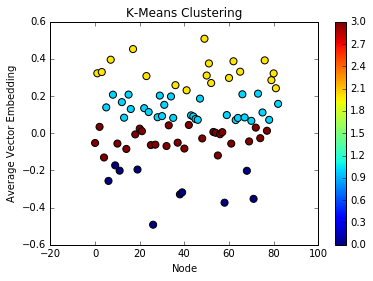

In [169]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(results.index,results.avg_embedding,
                     c=results.cluster,s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Node')
ax.set_ylabel('Average Vector Embedding')
plt.colorbar(scatter)

## To-do: Create a dataframe (subject x node, where each cell is the averaged word vector for that node) 

In [9]:
# create dataframe 
roi_labels = [] 
df_columns = [] 
for x in node_names.index:
    roi_labels.append(node_names.loc[x, 'hemisphere'] + node_names.loc[x, 'label'])
    df_columns.append(node_names.loc[x, 'hemisphere'] + node_names.loc[x, 'label'])
df_columns.insert(0, 'IMAGID')
df_columns.insert(1, 'visit')
index_range = range(0,244)
wordvec_df2 = pd.DataFrame(columns=df_columns)
wordvec_df = pd.read_csv("/project/6008063/llevitis/DIAN/derivatives/connectome_embedding_results/wvm_df.csv",index_col=0)
files = [op.join('/project/6008063/llevitis/DIAN/derivatives/diffusion_bids/graphs/Desikan2012/', fls)
         for fls in os.listdir('/project/6008063/llevitis/DIAN/derivatives/diffusion_bids/graphs/Desikan2012/')]
graphs = loadGraphs(files)

In [12]:
wordvec_df

,IMAGID,visit,rightlateralorbitofrontal,rightparsorbitalis,rightfrontalpole,rightmedialorbitofrontal,rightparstriangularis,rightparsopercularis,rightrostralmiddlefrontal,rightsuperiorfrontal,...,lefttransversetemporal,leftinsula,leftthalamusproper,leftcaudate,leftputamen,leftpallidum,leftaccumbensarea,lefthippocampus,leftamygdala,leftbrainstem
0,WQCPKV,v05,-0.649773,-0.693950,-0.190623,-0.156425,-0.631512,-0.383108,-0.194708,0.303965,...,-0.026848,0.180583,0.549069,0.496556,0.275971,0.514944,0.600428,0.398805,0.418929,0.314048
1,S6YAV3,v06,-0.286742,-0.226551,-0.043236,0.116024,-0.239939,0.237228,0.018598,0.354606,...,0.204675,0.042504,0.064854,0.228048,-0.101370,-0.129634,0.132879,-0.162759,-0.065894,-0.058474
2,KBOLFG,v03,-0.347007,-0.246899,-0.090645,-0.129076,-0.194416,-0.032935,-0.093252,0.083806,...,0.016332,-0.008486,0.107038,-0.003352,-0.121076,0.128459,0.033688,-0.012119,-0.063646,-0.060222
3,WDQRU0,v03,-0.319761,-0.362333,-0.145406,-0.224853,-0.139751,0.233441,0.158209,0.329467,...,-0.071307,0.012133,0.577721,0.333342,0.132171,0.242580,0.394874,0.396853,0.145670,0.358551
4,JQ8KSL,v00,-0.192172,-0.183235,-0.122283,-0.171901,-0.208153,0.032077,-0.057787,0.224385,...,0.192554,-0.004581,0.176646,-0.038852,-0.230803,-0.276932,-0.301172,-0.035132,-0.024525,-0.019541
5,LKU6IH,v03,0.025169,-0.129709,-0.086526,0.117996,-0.199695,0.135397,-0.195301,0.089364,...,0.058526,0.133501,-0.036768,0.024490,0.305434,0.375247,0.245025,0.079555,0.212603,-0.100582
6,2ZCX99,v02,-0.121919,-0.196482,0.016538,0.125064,-0.188840,0.098947,-0.162356,0.127778,...,-0.274997,-0.106226,0.190930,-0.055643,0.161561,0.364453,0.032107,0.148284,0.179219,0.084939
7,5HQBDJ,v00,-0.291870,-0.456993,-0.030667,-0.087433,-0.609555,-0.131081,-0.286751,-0.071421,...,-0.192264,-0.089318,0.097196,0.222366,0.283223,0.241244,0.332780,0.116895,0.120129,0.131662
8,PAU8PN,v02,-0.515305,-0.627177,0.059221,-0.121771,-0.526189,-0.308933,-0.057977,-0.131597,...,0.082629,0.149201,0.434651,0.251503,0.420537,0.239931,0.462503,0.542548,0.304055,0.246862
9,TLPC33,v00,-0.132476,-0.121784,-0.064619,0.071146,-0.224724,-0.256845,-0.229898,-0.090999,...,0.049979,0.092911,0.538690,0.381117,0.571380,0.688793,0.269564,0.436807,0.200036,0.321712


In [13]:
import networkx as nx
# check which graphs are weird af 
adj = {}
graphs_final = {} 
for subj in graphs: 
    if graphs[subj].nodes() != []: 
        tmp = nx.adj_matrix(graphs[subj], graphs[subj].nodes()).todense() 
        if tmp.shape == (83,83):
            adj[subj] = tmp
            graphs_final[subj] = graphs[subj]

In [14]:
graphs_final

{'sub-0F9ACS_ses-0F9ACSsv00smr_dwi_Desikan2012.edgelist': <networkx.classes.graph.Graph at 0x2b643182c290>,
 'sub-0O5OD0_ses-0O5OD0sv03smr_dwi_Desikan2012.edgelist': <networkx.classes.graph.Graph at 0x2b642d9adbd0>,
 'sub-0RN4X6_ses-0RN4X6sv00smr_dwi_Desikan2012.edgelist': <networkx.classes.graph.Graph at 0x2b64304bd250>,
 'sub-0ZI871_ses-0ZI871sv00smr_dwi_Desikan2012.edgelist': <networkx.classes.graph.Graph at 0x2b642cd69e90>,
 'sub-10H57G_ses-10H57Gsv05smr_dwi_Desikan2012.edgelist': <networkx.classes.graph.Graph at 0x2b642d9ad150>,
 'sub-1BVPA1_ses-1BVPA1sv02smr_dwi_Desikan2012.edgelist': <networkx.classes.graph.Graph at 0x2b642d9adc90>,
 'sub-1BVPA1_ses-1BVPA1sv03smr_dwi_Desikan2012.edgelist': <networkx.classes.graph.Graph at 0x2b642d9ad8d0>,
 'sub-1EBBWV_ses-1EBBWVsv00smr_dwi_Desikan2012.edgelist': <networkx.classes.graph.Graph at 0x2b642cd0a990>,
 'sub-1FXQEE_ses-1FXQEEsv01smr_dwi_Desikan2012.edgelist': <networkx.classes.graph.Graph at 0x2b642d9ad790>,
 'sub-1FXQEE_ses-1FXQEEsv02s

In [15]:
s = list(graphs_final)

In [16]:
len(s)

250

In [104]:
edgelist_name = s[0]
working_dir = '/project/6008063/llevitis/DIAN/derivatives/diffusion_bids/graphs/Desikan2012/'

In [105]:
edgelist_name

'sub-WQCPKV_ses-WQCPKVsv05smr_dwi_Desikan2012.edgelist'

In [58]:
input_edge_list = working_dir + edgelist_name
IMAGID = edgelist_name[4:10]
visit = edgelist_name[22:25]

In [59]:
input_edge_list

'/project/6008063/llevitis/DIAN/derivatives/diffusion_bids/graphs/Desikan2012/sub-S6YAV3_ses-S6YAV3sv06smr_dwi_Desikan2012.edgelist'

In [60]:
output_dir = '/project/6008063/llevitis/DIAN/derivatives/connectome_embedding_results/'
output_embedding = output_dir + IMAGID + "_" + visit + '_dti'

In [61]:
weighted=True
directed=False
dimensions = 20
walk_length = 50
num_walks=400
window_size=3
iter=1
workers=40
p=0.2
q=2.0
sg=0
nx_G = read_graph(input_edge_list, weighted, directed,node_names)
G = node2vec.Graph(nx_G, directed, p, q)
G.preprocess_transition_probs()
walks = G.simulate_walks(num_walks, walk_length)
model = learn_embeddings(walks, dimensions, window_size, workers, iter, output_embedding, sg)

['leftmedialorbitofrontal', 'leftlateralorbitofrontal', 'leftprecentral', 'leftmiddletemporal', 'rightisthmuscingulate', 'rightrostralanteriorcingulate', 'rightparsorbitalis', 'leftlingual', 'leftinsula', 'leftcuneus', 'leftrostralanteriorcingulate', 'leftbankssts', 'leftsuperiorfrontal', 'leftpericalcarine', 'leftprecuneus', 'righthippocampus', 'leftbrainstem', 'rightlingual', 'rightmedialorbitofrontal', 'leftposteriorcingulate', 'leftthalamusproper', 'rightlateraloccipital', 'rightrostralmiddlefrontal', 'leftlateraloccipital', 'leftinferiorparietal', 'leftisthmuscingulate', 'leftentorhinal', 'rightparahippocampal', 'lefttransversetemporal', 'rightparacentral', 'rightsupramarginal', 'rightentorhinal', 'leftinferiortemporal', 'rightinsula', 'leftputamen', 'leftsuperiorparietal', 'leftsupramarginal', 'rightpostcentral', 'rightaccumbensarea', 'righttransversetemporal', 'rightparsopercularis', 'rightposteriorcingulate', 'leftparsopercularis', 'leftparacentral', 'leftrostralmiddlefrontal',

In [62]:
model.wv['leftsuperiortemporal']

array([ 2.4789772 ,  1.0483214 ,  0.55510664,  1.3464297 ,  1.3390348 ,
       -1.2799809 , -1.9603467 , -0.90442884, -3.6625643 ,  0.7314824 ,
       -0.3075451 ,  0.19058678, -0.5614319 ,  1.573118  ,  3.0508583 ,
        0.31635854,  0.6802848 ,  0.8148596 , -0.19155584,  0.15331104],
      dtype=float32)

In [63]:
model.wv['rightsuperiortemporal']

array([ 0.11250688,  1.3512827 , -1.1312367 , -1.510535  , -0.2834101 ,
       -1.6768469 ,  1.0515577 ,  1.4885807 ,  1.3561207 ,  0.04028   ,
        0.7528263 ,  0.10952473, -1.9134738 , -3.1160164 ,  0.04306064,
        0.25832364,  2.4275215 , -2.0391207 ,  2.248496  ,  0.24014118],
      dtype=float32)

In [67]:
wvm = node2veclearn(input_edge_list, output_embedding, node_names, dimensions = 20, walk_length = 50,  num_walks=400, window_size=3, iter=1, workers=40, p=0.2, q=2.0, weighted=True, directed=False)

['leftmedialorbitofrontal', 'leftlateralorbitofrontal', 'leftprecentral', 'leftmiddletemporal', 'rightisthmuscingulate', 'rightrostralanteriorcingulate', 'rightparsorbitalis', 'leftlingual', 'leftinsula', 'leftcuneus', 'leftrostralanteriorcingulate', 'leftbankssts', 'leftsuperiorfrontal', 'leftpericalcarine', 'leftprecuneus', 'righthippocampus', 'leftbrainstem', 'rightlingual', 'rightmedialorbitofrontal', 'leftposteriorcingulate', 'leftthalamusproper', 'rightlateraloccipital', 'rightrostralmiddlefrontal', 'leftlateraloccipital', 'leftinferiorparietal', 'leftisthmuscingulate', 'leftentorhinal', 'rightparahippocampal', 'lefttransversetemporal', 'rightparacentral', 'rightsupramarginal', 'rightentorhinal', 'leftinferiortemporal', 'rightinsula', 'leftputamen', 'leftsuperiorparietal', 'leftsupramarginal', 'rightpostcentral', 'rightaccumbensarea', 'righttransversetemporal', 'rightparsopercularis', 'rightposteriorcingulate', 'leftparsopercularis', 'leftparacentral', 'leftrostralmiddlefrontal',

In [17]:
def update_df_with_wordvec(i, edgelist_name, df, roi_labels):
    IMAGID = edgelist_name[4:10]
    visit = edgelist_name[22:25]
    working_dir = '/project/6008063/llevitis/DIAN/derivatives/diffusion_bids/graphs/Desikan2012/'
    input_edge_list = working_dir + edgelist_name
    output_dir = '/project/6008063/llevitis/DIAN/derivatives/connectome_embedding_results/'
    output_embedding = output_dir + IMAGID + "_" + visit + '_dti'
    wvm = node2veclearn(input_edge_list, output_embedding, node_names, dimensions = 20, walk_length = 50,  num_walks=400, window_size=3, iter=1, workers=40, p=0.2, q=2.0, weighted=True, directed=False)
    vector_avg_dict = dict.fromkeys(roi_labels)
    for node in vector_avg_dict.keys(): 
        vector_avg_dict[node] = np.mean(wvm.wv[node])
    df.loc[i, 'IMAGID'] = IMAGID
    df.loc[i, 'visit'] = visit
    for node in roi_labels:  
        df.loc[i, node] = vector_avg_dict[node]
    return df

In [18]:
wordvec_df.head()

,IMAGID,visit,rightlateralorbitofrontal,rightparsorbitalis,rightfrontalpole,rightmedialorbitofrontal,rightparstriangularis,rightparsopercularis,rightrostralmiddlefrontal,rightsuperiorfrontal,...,lefttransversetemporal,leftinsula,leftthalamusproper,leftcaudate,leftputamen,leftpallidum,leftaccumbensarea,lefthippocampus,leftamygdala,leftbrainstem
0,WQCPKV,v05,-0.649773,-0.693950,-0.190623,-0.156425,-0.631512,-0.383108,-0.194708,0.303965,...,-0.026848,0.180583,0.549069,0.496556,0.275971,0.514944,0.600428,0.398805,0.418929,0.314048
1,S6YAV3,v06,-0.286742,-0.226551,-0.043236,0.116024,-0.239939,0.237228,0.018598,0.354606,...,0.204675,0.042504,0.064854,0.228048,-0.101370,-0.129634,0.132879,-0.162759,-0.065894,-0.058474
2,KBOLFG,v03,-0.347007,-0.246899,-0.090645,-0.129076,-0.194416,-0.032935,-0.093252,0.083806,...,0.016332,-0.008486,0.107038,-0.003352,-0.121076,0.128459,0.033688,-0.012119,-0.063646,-0.060222
3,WDQRU0,v03,-0.319761,-0.362333,-0.145406,-0.224853,-0.139751,0.233441,0.158209,0.329467,...,-0.071307,0.012133,0.577721,0.333342,0.132171,0.242580,0.394874,0.396853,0.145670,0.358551
4,JQ8KSL,v00,-0.192172,-0.183235,-0.122283,-0.171901,-0.208153,0.032077,-0.057787,0.224385,...,0.192554,-0.004581,0.176646,-0.038852,-0.230803,-0.276932,-0.301172,-0.035132,-0.024525,-0.019541


In [28]:
i = 0
for i in range(225, len(s)): 
    edgelist_name = s[i] 
    update_df_with_wordvec(i, edgelist_name, wordvec_df, roi_labels)

Walk iteration:
1 / 400
101 / 400
201 / 400
301 / 400
Walk iteration:
1 / 400
101 / 400
201 / 400
301 / 400
Walk iteration:
1 / 400
101 / 400
201 / 400
301 / 400
Walk iteration:
1 / 400
101 / 400
201 / 400
301 / 400
Walk iteration:
1 / 400
101 / 400
201 / 400
301 / 400
Walk iteration:
1 / 400
101 / 400
201 / 400
301 / 400
Walk iteration:
1 / 400
101 / 400
201 / 400
301 / 400
Walk iteration:
1 / 400
101 / 400
201 / 400
301 / 400
Walk iteration:
1 / 400
101 / 400
201 / 400
301 / 400
Walk iteration:
1 / 400
101 / 400
201 / 400
301 / 400
Walk iteration:
1 / 400
101 / 400
201 / 400
301 / 400
Walk iteration:
1 / 400
101 / 400
201 / 400
301 / 400
Walk iteration:
1 / 400
101 / 400
201 / 400
301 / 400
Walk iteration:
1 / 400
101 / 400
201 / 400
301 / 400
Walk iteration:
1 / 400
101 / 400
201 / 400
301 / 400
Walk iteration:
1 / 400
101 / 400
201 / 400
301 / 400
Walk iteration:
1 / 400
101 / 400
201 / 400
301 / 400
Walk iteration:
1 / 400
101 / 400
201 / 400
301 / 400
Walk iteration:
1 / 400
101 

In [29]:
wordvec_df

,IMAGID,visit,rightlateralorbitofrontal,rightparsorbitalis,rightfrontalpole,rightmedialorbitofrontal,rightparstriangularis,rightparsopercularis,rightrostralmiddlefrontal,rightsuperiorfrontal,...,lefttransversetemporal,leftinsula,leftthalamusproper,leftcaudate,leftputamen,leftpallidum,leftaccumbensarea,lefthippocampus,leftamygdala,leftbrainstem
0,WQCPKV,v05,-0.649773,-0.693950,-0.190623,-0.156425,-0.631512,-0.383108,-0.194708,0.303965,...,-0.026848,0.180583,0.549069,0.496556,0.275971,0.514944,0.600428,0.398805,0.418929,0.314048
1,S6YAV3,v06,-0.286742,-0.226551,-0.043236,0.116024,-0.239939,0.237228,0.018598,0.354606,...,0.204675,0.042504,0.064854,0.228048,-0.101370,-0.129634,0.132879,-0.162759,-0.065894,-0.058474
2,KBOLFG,v03,-0.347007,-0.246899,-0.090645,-0.129076,-0.194416,-0.032935,-0.093252,0.083806,...,0.016332,-0.008486,0.107038,-0.003352,-0.121076,0.128459,0.033688,-0.012119,-0.063646,-0.060222
3,WDQRU0,v03,-0.319761,-0.362333,-0.145406,-0.224853,-0.139751,0.233441,0.158209,0.329467,...,-0.071307,0.012133,0.577721,0.333342,0.132171,0.242580,0.394874,0.396853,0.145670,0.358551
4,JQ8KSL,v00,-0.192172,-0.183235,-0.122283,-0.171901,-0.208153,0.032077,-0.057787,0.224385,...,0.192554,-0.004581,0.176646,-0.038852,-0.230803,-0.276932,-0.301172,-0.035132,-0.024525,-0.019541
5,LKU6IH,v03,0.025169,-0.129709,-0.086526,0.117996,-0.199695,0.135397,-0.195301,0.089364,...,0.058526,0.133501,-0.036768,0.024490,0.305434,0.375247,0.245025,0.079555,0.212603,-0.100582
6,2ZCX99,v02,-0.121919,-0.196482,0.016538,0.125064,-0.188840,0.098947,-0.162356,0.127778,...,-0.274997,-0.106226,0.190930,-0.055643,0.161561,0.364453,0.032107,0.148284,0.179219,0.084939
7,5HQBDJ,v00,-0.291870,-0.456993,-0.030667,-0.087433,-0.609555,-0.131081,-0.286751,-0.071421,...,-0.192264,-0.089318,0.097196,0.222366,0.283223,0.241244,0.332780,0.116895,0.120129,0.131662
8,PAU8PN,v02,-0.515305,-0.627177,0.059221,-0.121771,-0.526189,-0.308933,-0.057977,-0.131597,...,0.082629,0.149201,0.434651,0.251503,0.420537,0.239931,0.462503,0.542548,0.304055,0.246862
9,TLPC33,v00,-0.132476,-0.121784,-0.064619,0.071146,-0.224724,-0.256845,-0.229898,-0.090999,...,0.049979,0.092911,0.538690,0.381117,0.571380,0.688793,0.269564,0.436807,0.200036,0.321712


In [31]:
wordvec_df = wordvec_df.rename(columns=lambda x: x + '_w2v')

In [35]:
wordvec_df = wordvec_df.rename(columns={'IMAGID_w2v': 'IMAGID', 'visit_w2v': 'visit'})

In [36]:
wordvec_df.head()

,IMAGID,visit,rightlateralorbitofrontal_w2v,rightparsorbitalis_w2v,rightfrontalpole_w2v,rightmedialorbitofrontal_w2v,rightparstriangularis_w2v,rightparsopercularis_w2v,rightrostralmiddlefrontal_w2v,rightsuperiorfrontal_w2v,...,lefttransversetemporal_w2v,leftinsula_w2v,leftthalamusproper_w2v,leftcaudate_w2v,leftputamen_w2v,leftpallidum_w2v,leftaccumbensarea_w2v,lefthippocampus_w2v,leftamygdala_w2v,leftbrainstem_w2v
0,WQCPKV,v05,-0.649773,-0.693950,-0.190623,-0.156425,-0.631512,-0.383108,-0.194708,0.303965,...,-0.026848,0.180583,0.549069,0.496556,0.275971,0.514944,0.600428,0.398805,0.418929,0.314048
1,S6YAV3,v06,-0.286742,-0.226551,-0.043236,0.116024,-0.239939,0.237228,0.018598,0.354606,...,0.204675,0.042504,0.064854,0.228048,-0.101370,-0.129634,0.132879,-0.162759,-0.065894,-0.058474
2,KBOLFG,v03,-0.347007,-0.246899,-0.090645,-0.129076,-0.194416,-0.032935,-0.093252,0.083806,...,0.016332,-0.008486,0.107038,-0.003352,-0.121076,0.128459,0.033688,-0.012119,-0.063646,-0.060222
3,WDQRU0,v03,-0.319761,-0.362333,-0.145406,-0.224853,-0.139751,0.233441,0.158209,0.329467,...,-0.071307,0.012133,0.577721,0.333342,0.132171,0.242580,0.394874,0.396853,0.145670,0.358551
4,JQ8KSL,v00,-0.192172,-0.183235,-0.122283,-0.171901,-0.208153,0.032077,-0.057787,0.224385,...,0.192554,-0.004581,0.176646,-0.038852,-0.230803,-0.276932,-0.301172,-0.035132,-0.024525,-0.019541


In [37]:
wordvec_df.to_csv("/project/6008063/llevitis/DIAN/derivatives/connectome_embedding_results/wvm_df.csv")

In [14]:
i = 1
edgelist_name = s[i] 
update_df_with_wordvec(i, edgelist_name, wordvec_df, roi_labels)

Walk iteration:
1 / 400
101 / 400
201 / 400
301 / 400


,IMAGID,visit,rightlateralorbitofrontal,rightparsorbitalis,rightfrontalpole,rightmedialorbitofrontal,rightparstriangularis,rightparsopercularis,rightrostralmiddlefrontal,rightsuperiorfrontal,...,lefttransversetemporal,leftinsula,leftthalamusproper,leftcaudate,leftputamen,leftpallidum,leftaccumbensarea,lefthippocampus,leftamygdala,leftbrainstem
1,S6YAV3,v06,-0.0857292,-0.0296389,0.134022,0.448005,-0.0442443,0.353236,0.394658,0.488026,...,0.29914,0.256199,0.323471,0.473827,0.107693,0.0870482,0.294433,0.0400756,0.0868224,0.0889937


### Scratch

In [11]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(word2vec.itervalues().next())

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [9]:
walks_agg = node2vec_agg_walks(input_edge_list, directed=False)

['leftmedialorbitofrontal', 'leftlateralorbitofrontal', 'leftprecentral', 'leftmiddletemporal', 'rightisthmuscingulate', 'rightrostralanteriorcingulate', 'rightparsorbitalis', 'leftlingual', 'leftinsula', 'leftcuneus', 'leftrostralanteriorcingulate', 'leftbankssts', 'leftsuperiorfrontal', 'leftpericalcarine', 'leftprecuneus', 'righthippocampus', 'leftbrainstem', 'rightlingual', 'rightmedialorbitofrontal', 'leftposteriorcingulate', 'leftthalamusproper', 'rightlateraloccipital', 'rightrostralmiddlefrontal', 'leftlateraloccipital', 'leftinferiorparietal', 'leftisthmuscingulate', 'leftentorhinal', 'rightparahippocampal', 'lefttransversetemporal', 'rightparacentral', 'rightsupramarginal', 'rightentorhinal', 'leftinferiortemporal', 'rightinsula', 'leftputamen', 'leftsuperiorparietal', 'leftsupramarginal', 'rightpostcentral', 'rightaccumbensarea', 'righttransversetemporal', 'rightparsopercularis', 'rightposteriorcingulate', 'leftparsopercularis', 'leftparacentral', 'leftrostralmiddlefrontal',

In [10]:
walks_agg

[['rightlateralorbitofrontal',
  'rightputamen',
  'rightcaudalmiddlefrontal',
  'rightsuperiorfrontal',
  'rightparacentral',
  'rightpostcentral',
  'rightprecentral',
  'rightpostcentral',
  'rightsuperiortemporal',
  'rightsupramarginal'],
 ['leftpericalcarine',
  'leftlingual',
  'leftprecuneus',
  'leftparacentral',
  'leftsuperiorparietal',
  'leftparacentral',
  'leftsuperiorfrontal',
  'leftprecentral',
  'leftcaudalmiddlefrontal',
  'leftsuperiorfrontal'],
 ['rightpallidum',
  'rightputamen',
  'rightcaudate',
  'rightthalamusproper',
  'rightprecentral',
  'rightisthmuscingulate',
  'rightthalamusproper',
  'rightcaudate',
  'rightsuperiorfrontal',
  'rightthalamusproper'],
 ['leftsupramarginal',
  'leftsuperiortemporal',
  'leftinsula',
  'leftparsopercularis',
  'leftparstriangularis',
  'leftcaudate',
  'leftputamen',
  'leftbrainstem',
  'lefthippocampus',
  'leftisthmuscingulate'],
 ['rightrostralanteriorcingulate',
  'rightsuperiorfrontal',
  'rightparsopercularis',
  

In [13]:
dir_name = '/project/6008063/llevitis/DIAN/derivatives/diffusion_bids/graphs/Desikan2012/'
output_embedding = dir_name + 'CXRL3Esv03_dti'
current_name = 'sample'
lesion_node = 0 
with open(dir_name + current_name + '_walks_lesion_' + str(lesion_node), 'w') as f:
    pickle.dump(walks_agg, f)
word2vec_permutations = np.zeros([permutation_no, number_of_nodes, dimensions])
count = 0
for permute in range(0, permutation_no * num_walks * number_of_nodes, num_walks * number_of_nodes):
    model = learn_embeddings(walks[permute:permute + num_walks * number_of_nodes], dimensions, window_size, workers,
                             iter, output_embedding, sg)
    word2Vecmodelsorted = normalize_embeddings(model)

    word2vec_permutations[count, ...] = word2Vecmodelsorted
    count += 1
#word2Vecmodelsorted = node2veclearn_agg(walks_agg, output_embedding)

NameError: name 'permutation_no' is not defined

In [12]:
model.wv.vocab

NameError: name 'model' is not defined

In [10]:
embeddings = open('/project/6008063/llevitis/DIAN/derivatives/diffusion_bids/graphs/Desikan2012/CXRL3Esv03_dti.embeddings')

In [16]:
len(walks_agg)

664

In [38]:
dir_name = '/project/6008063/llevitis/DIAN/derivatives/diffusion_bids/graphs/Desikan2012/'
input_edge_list = dir_name + 'sub-CXRL3E_ses-CXRL3Esv03smr_dwi_Desikan2012-new.edgelist'
output_embedding = dir_name + 'CXRL3Esv03_dti'
current_name = 'sample'
lesion_node = 0
current_dti = graphs['sub-CXRL3E_ses-CXRL3Esv03smr_dwi_Desikan2012.edgelist']
create_embedding(dir_name, input_edge_list, output_embedding, current_dti, current_name,
                     permutation_no=500, lesion_node = 0, dimensions=30, walk_length=20,
                     num_walks=800, window_size=3, iter=1, workers=10, p=0.1, q=1.6, sg=0,
                     weighted=True, directed=False)

AttributeError: 'Graph' object has no attribute 'shape'

In [17]:
dir_name = '/project/6008063/llevitis/DIAN/derivatives/diffusion_bids/graphs/Desikan2012/'
input_edge_list = dir_name + 'sub-CXRL3E_ses-CXRL3Esv03smr_dwi_Desikan2012.edgelist'
output_embedding = dir_name + 'CXRL3Esv03_dti'
current_name = 'sample'
lesion_node = 0
#walks_agg = node2vec_agg_walks(input_edge_list, directed=False)
#with open(dir_name + current_name + '_walks_lesion_' + str(lesion_node), 'w') as f:
#    pickle.dump(walks_agg, f)
#word2Vecmodelsorted = node2veclearn_agg(walks_agg, output_embedding)

walks_agg = node2vec_agg_walks(input_edge_list, directed=False)
with open(dir_name + current_name + '_walks_lesion_' + str(lesion_node), 'w') as f:
    pickle.dump(walks_agg, f)
word2Vecmodelsorted = node2veclearn_agg(walks_agg, output_embedding)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]
Walk iteration:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]
Walk iteration:


/home/llevitis/py27/lib/python2.7/site-packages/ipykernel_launcher.py:117: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
/home/llevitis/py27/lib/python2.7/site-packages/ipykernel_launcher.py:118: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
/home/llevitis/py27/lib/python2.7/site-packages/ipykernel_launcher.py:119: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


RuntimeError: you must first build vocabulary before training the model

In [84]:
model = Word2Vec.load(output_embedding + '.embeddings')

In [128]:
print(res['rostralmiddlefrontal'])

[ 0.13030006  1.4234784   0.20496833  1.1064823   0.0139147   0.23516168
  0.48971537 -2.0563405  -0.5879294   0.5154474   0.94077295  1.3974952
 -1.2328011   0.1935401   0.16115189  0.45249155  0.13894425 -0.11698679
 -0.37758526 -0.18644801  0.11891915  0.2860668  -0.29834467 -0.04698363
 -0.68465984 -1.1374457   0.1899907  -0.7647847   0.23025854 -0.7777499 ]


/home/llevitis/py27/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [150]:
word2Vecmodel = res 
normalizer = Normalizer(copy=False)
word2Vecmodelsorted = np.zeros([word2Vecmodel.wv.syn0.shape[0], word2Vecmodel.wv.syn0.shape[1]])
for i in range(word2Vecmodel.wv.syn0.shape[0]):
    model_copy = np.copy(word2Vecmodel[str(i)])
    reshaped_model = np.reshape(model_copy, (1, -1))
    word2Vecmodelsorted[i] = normalizer.fit_transform(reshaped_model)

/home/llevitis/py27/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/home/llevitis/py27/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  after removing the cwd from sys.path.
/home/llevitis/py27/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [160]:
word2Vecmodelsorted[7]

array([-0.02530491,  0.2231832 ,  0.19125631,  0.07284398, -0.16391341,
       -0.08807752, -0.11381731, -0.16819808,  0.0872734 , -0.16223441,
        0.00061473, -0.10998879, -0.12059495, -0.32340649,  0.18605873,
        0.10114954,  0.13823292, -0.12891361,  0.36299968, -0.18204059,
        0.30449119,  0.19152318, -0.14035414,  0.09800507,  0.12657894,
       -0.19403103,  0.21979892, -0.24106893, -0.29547676, -0.12262758])

In [40]:
res.wv.vocab

{'0': <gensim.models.keyedvectors.Vocab at 0x2b243fbf2750>,
 '1': <gensim.models.keyedvectors.Vocab at 0x2b243fbf2790>,
 '10': <gensim.models.keyedvectors.Vocab at 0x2b243fbca290>,
 '11': <gensim.models.keyedvectors.Vocab at 0x2b23fbb75390>,
 '12': <gensim.models.keyedvectors.Vocab at 0x2b243aabb4d0>,
 '13': <gensim.models.keyedvectors.Vocab at 0x2b243fbf2510>,
 '14': <gensim.models.keyedvectors.Vocab at 0x2b243fbf2e90>,
 '15': <gensim.models.keyedvectors.Vocab at 0x2b243fbca690>,
 '16': <gensim.models.keyedvectors.Vocab at 0x2b23ea0b7190>,
 '17': <gensim.models.keyedvectors.Vocab at 0x2b243fbca310>,
 '18': <gensim.models.keyedvectors.Vocab at 0x2b243f6ae6d0>,
 '19': <gensim.models.keyedvectors.Vocab at 0x2b243aa88990>,
 '2': <gensim.models.keyedvectors.Vocab at 0x2b243fbf26d0>,
 '20': <gensim.models.keyedvectors.Vocab at 0x2b243fbf2a90>,
 '21': <gensim.models.keyedvectors.Vocab at 0x2b243fbf2a50>,
 '22': <gensim.models.keyedvectors.Vocab at 0x2b243fbf2f50>,
 '23': <gensim.models.keyed

/home/llevitis/py27/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `accuracy` (Method will be removed in 4.0.0, use self.wv.evaluate_word_analogies() instead).
  """Entry point for launching an IPython kernel.


TypeError: accuracy() takes at least 2 arguments (1 given)